# Machine Learning vs. Traditional Programming Paradigm

### Key Difference:
- **Traditional Programming**: Requires explicit rules and logic to process data and produce outputs.
- **Machine Learning**: Learns patterns from data to make predictions or decisions without explicitly defined rules.

&rarr; Refer to today's discussion.

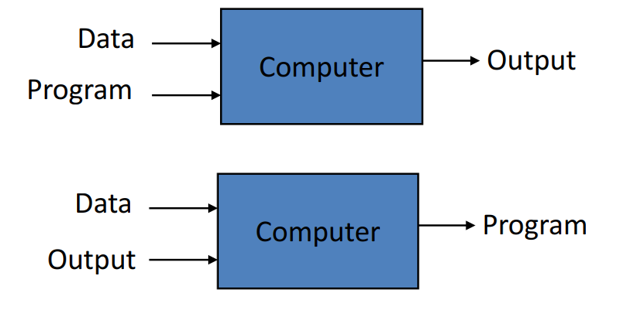

## Assume below scnario, and observation data

In [12]:
import numpy as np

# Data for regression: [distance, traffic_level (0=light, 1=moderate, 2=heavy)]
X_regression = np.array([[5, 0], [10, 1], [15, 2], [20, 0], [25, 1]])
y_regression = np.array([5, 15, 30, 20, 37.5])  # travel times

# Data for classification: [fever, cough, headache, stomach pain] (1=present, 0=absent)
X_classification = np.array([[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0]])
y_classification = np.array(['Flu', 'Headache', 'Unknown'])  # diagnoses

## Example 1: Regression - Estimating Travel Time

The goal is to estimate the travel time based on distance and traffic conditions of the above observational data

### <b> <font color=green> Traditional Programming Approach </font> </b>

In [14]:
def estimate_travel_time(distance, traffic):
    if traffic == 'heavy':
        return distance * 2  # Assume heavy traffic doubles the time
    elif traffic == 'moderate':
        return distance * 1.5  # Moderate traffic increases time by 50%
    else:
        return distance  # Light traffic assumes 1 unit time per distance

In [15]:
# Example usage
distance = 10  # in km
traffic = 'moderate'
print(f"Estimated Travel Time: {estimate_travel_time(distance, traffic)} minutes")

Estimated Travel Time: 15.0 minutes


### <b> <font color=green> Machine Learning Approach </font> </b>

In [17]:
from sklearn.linear_model import LinearRegression

# Train ML model
model = LinearRegression()
model.fit(X_regression, y_regression)

LinearRegression()

In [18]:
# Predict travel time
test_data = np.array([[10, 1]])  # Distance=10, Traffic=moderate
predicted_time = model.predict(test_data)[0]
print(f"Predicted Travel Time: {predicted_time:.2f} minutes")

Predicted Travel Time: 16.67 minutes


## Example 2: Classification - Medical Diagnosis

The goal is to classify whether a patient has a disease based on symptoms using both paradigms.

### <b> <font color=green> Traditional Programming Approach </font> </b>

In [19]:
def diagnose(symptoms):
    if 'fever' in symptoms and 'cough' in symptoms:
        return 'Flu'
    elif 'headache' in symptoms and 'stomach pain' in symptoms:
        return 'Headache'
    else:
        return 'Unknown'

In [20]:
# Example usage
symptoms = ['fever', 'cough']
print(f"Diagnosis: {diagnose(symptoms)}")

Diagnosis: Flu


### <b> <font color=green> Machine Learning Approach </font> </b>

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train model
model = DecisionTreeClassifier()
model.fit(X_classification, y_classification)

DecisionTreeClassifier()

In [23]:
# Predict diagnosis
test_data = np.array([[1, 1, 0, 0]])  # Fever and cough
predicted_diagnosis = model.predict(test_data)[0]
print(f"Predicted Diagnosis: {predicted_diagnosis}")

Predicted Diagnosis: Flu


## Example 3: Image-Based Tasks (Complex Task)

The goal is to identify simple pattrens in an image.

In [24]:
# Define the data for both paradigms
import matplotlib.pyplot as plt

# A simple 5x5 grid image where 1 represents a filled pixel and 0 represents an empty pixel
horizontal_line_image = [
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

vertical_line_image = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
]

# Labels for Machine Learning: 0 = No line, 1 = Horizontal line, 2 = Vertical line
X = [
    [0, 0, 0, 0, 0, 1],  # No line
    [1, 1, 1, 1, 1, 1],  # Horizontal line
    [0, 0, 0, 0, 0, 0],  # No line
    [0, 1, 0, 0, 0, 2]   # Vertical line
]
y = [0, 1, 0, 2]  # Labels

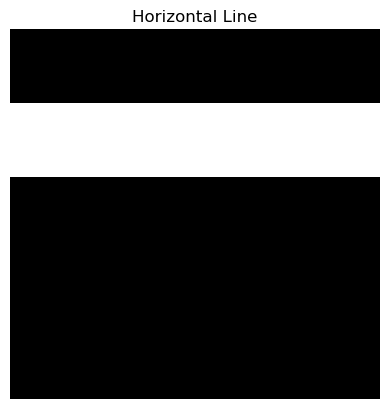

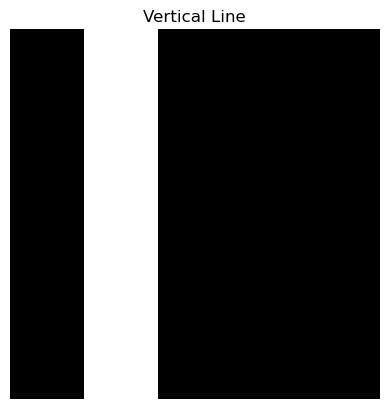

In [26]:
# Visualize the synthatic images
def visualize_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display horizontal and vertical line images
visualize_image(horizontal_line_image, 'Horizontal Line')
visualize_image(vertical_line_image, 'Vertical Line')

### <b> <font color=green> Traditional Programming Approach </font> </b>

Consider a simple 5x5 grid image where `1` represents a filled pixel and `0` represents an empty pixel. The task is to identify whether the image contains a horizontal or vertical line.

In [28]:
def contains_horizontal_line(image):
    for row in image:
        if all(pixel == 1 for pixel in row):
            return True
    return False

def contains_vertical_line(image):
    for col in range(len(image[0])):
        if all(row[col] == 1 for row in image):
            return True
    return False

In [29]:
# Example usage
print(f"Contains Horizontal Line: {contains_horizontal_line(horizontal_line_image)}")
print(f"Contains Vertical Line: {contains_vertical_line(vertical_line_image)}")

Contains Horizontal Line: True
Contains Vertical Line: True


### <b> <font color=green> Machine Learning Approach </font> </b>

Using a simple Machine Learning model ti train to  recognize patterns in the images

In [30]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
# Predict 1
test_image = [[0, 1, 0, 0, 0, 2]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Vertical Line


In [33]:
# Predict 2
test_image = [[1, 1, 1, 1, 1, 1]]  # Vertical line
prediction = model.predict(test_image)[0]
print(f"Predicted: {'Horizontal Line' if prediction == 1 else 'Vertical Line' if prediction == 2 else 'No Line'}")

Predicted: Horizontal Line
